**1. Text Preprocessing:**

                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kalpana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kalpana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Review 1: I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery 

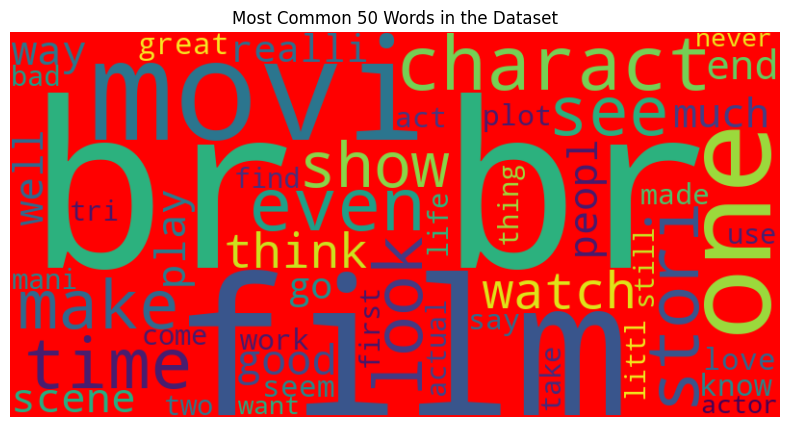

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 2: Read the dataset into a pandas DataFrame
df = pd.read_csv('MovieReview.csv')
print(df.head())

# Step 3: Text preprocessing with both stemming and lemmatization
nltk.download('wordnet')
nltk.download('stopwords')

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text_with_stemming_and_lemmatization(text):
    tokens = word_tokenize(text.lower())  # Tokenization and convert to lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    stemmed_tokens = [ps.stem(token) for token in tokens]  # Stemming
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]  # Lemmatization
    return " ".join(lemmatized_tokens)

# Applying text preprocessing to the 'text' column
df['preprocessed_text_with_stemming_and_lemmatization'] = df['text'].apply(preprocess_text_with_stemming_and_lemmatization)

# Step 4: Display preprocessed text for the first five reviews with stemming and lemmatization
for i in range(5):
    print(f"Original Review {i + 1}: {df['text'].iloc[i]}")
    print(f"Preprocessed Review with Stemming and Lemmatization: {df['preprocessed_text_with_stemming_and_lemmatization'].iloc[i]}")
    print()

# Step 5: Plot word cloud for preprocessed text with stemming and lemmatization
all_text_stem_lem = ' '.join(df['preprocessed_text_with_stemming_and_lemmatization'])
wordcloud_stem_lem = WordCloud(width=800, height=400, max_words=50, background_color='red').generate(all_text_stem_lem)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stem_lem, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common 50 Words in the Dataset')
plt.show()


**2. Text Similarity**

In [6]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

# Step 1: Read the dataset from the CSV file into a pandas DataFrame
df = pd.read_csv('MovieReview.csv')

# Step 2: Apply text preprocessing

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    return " ".join(stemmed_tokens)

df['preprocessed_text'] = df['text'].apply(preprocess_text)


# Step 3: Create Text1 and Text2 files
text1 = ' '.join(df['preprocessed_text'][:20])
text2 = ' '.join(df['preprocessed_text'][20:40])

with open('Text1.txt', 'w', encoding='utf-8') as file:
    file.write(text1)

with open('Text2.txt', 'w', encoding='utf-8') as file:
    file.write(text2)


# Step 4: Apply cosine similarity to Text1 and Text2
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print("Cosine Similarity between Text1 and Text2:", cosine_sim[0][0])


# Step 5: Apply Jaccard similarity to pairs of reviews
jaccard_similarities = []
max_reviews = 100  

for i in range(len(df)):
    for j in range(i + 1, min(i + max_reviews + 1, len(df))): 
        set1 = set(df['preprocessed_text'][i].split())
        set2 = set(df['preprocessed_text'][j].split())
        jaccard_sim = len(set1.intersection(set2)) / len(set1.union(set2))
        jaccard_similarities.append(jaccard_sim)
        
# Calculate Jaccard similarity for the entire dataset
jaccard_similarity = sum(jaccard_similarities) / len(jaccard_similarities)

# Print the Jaccard similarity
print("Jaccard similarity between Text1 and Text2:", jaccard_similarity)




Cosine Similarity between Text1 and Text2: 0.745186845383862
Jaccard similarity between Text1 and Text2: 0.045111236084852846


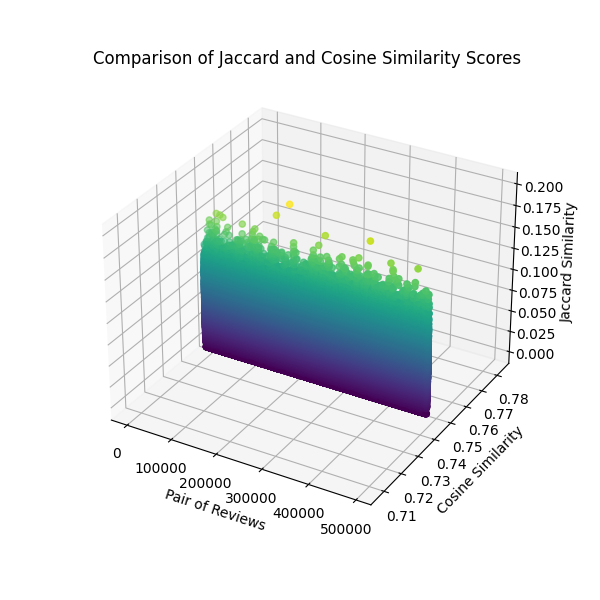

In [7]:
# Calculate cosine similarity between text1 and text2
cosine_similarity_score = cosine_sim[0][0]

# Plotting similarity scores using a 3D scatter plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

x = range(len(jaccard_similarities))
y = [cosine_similarity_score] * len(jaccard_similarities)
z = jaccard_similarities

ax.scatter(x, y, z, c=z, cmap='viridis')

ax.set_xlabel('Pair of Reviews')
ax.set_ylabel('Cosine Similarity')
ax.set_zlabel('Jaccard Similarity')

plt.title('Comparison of Jaccard and Cosine Similarity Scores')

plt.show()